In [1]:
from IPython.display import Image 

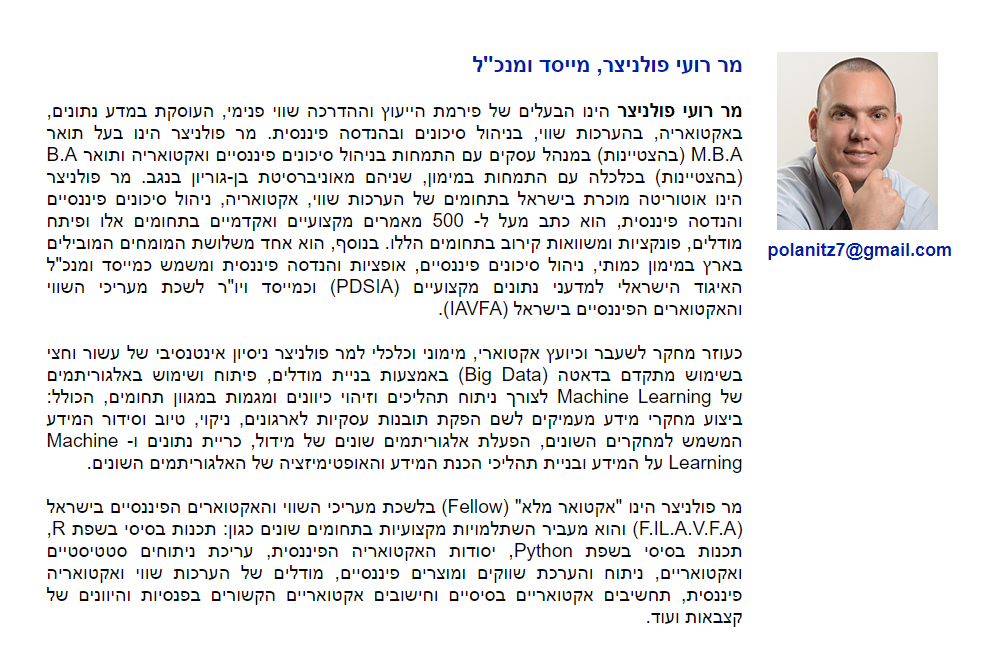

In [2]:
Image(filename='roi123.png')

# Motivation

In order to predict diamonds prices, I chose the diamond prices dataset that was sourced from Kaggle Diamonds Database. This dataset contains the prices and other attributes of almost 54,000 diamonds. It has many characteristics of learning, and the dataset can be downloaded from here.
https://www.kaggle.com/shivam2503/diamonds?select=diamonds.csv

# Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [6]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
data.rename(columns={"Unnamed: 0":"DianmondID"}, inplace=True)
data

,DianmondID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
data.shape

(53940, 11)

I now use the describe() method to show the summary statistics of the numeric variables.

In [10]:
data.describe()

,DianmondID,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles

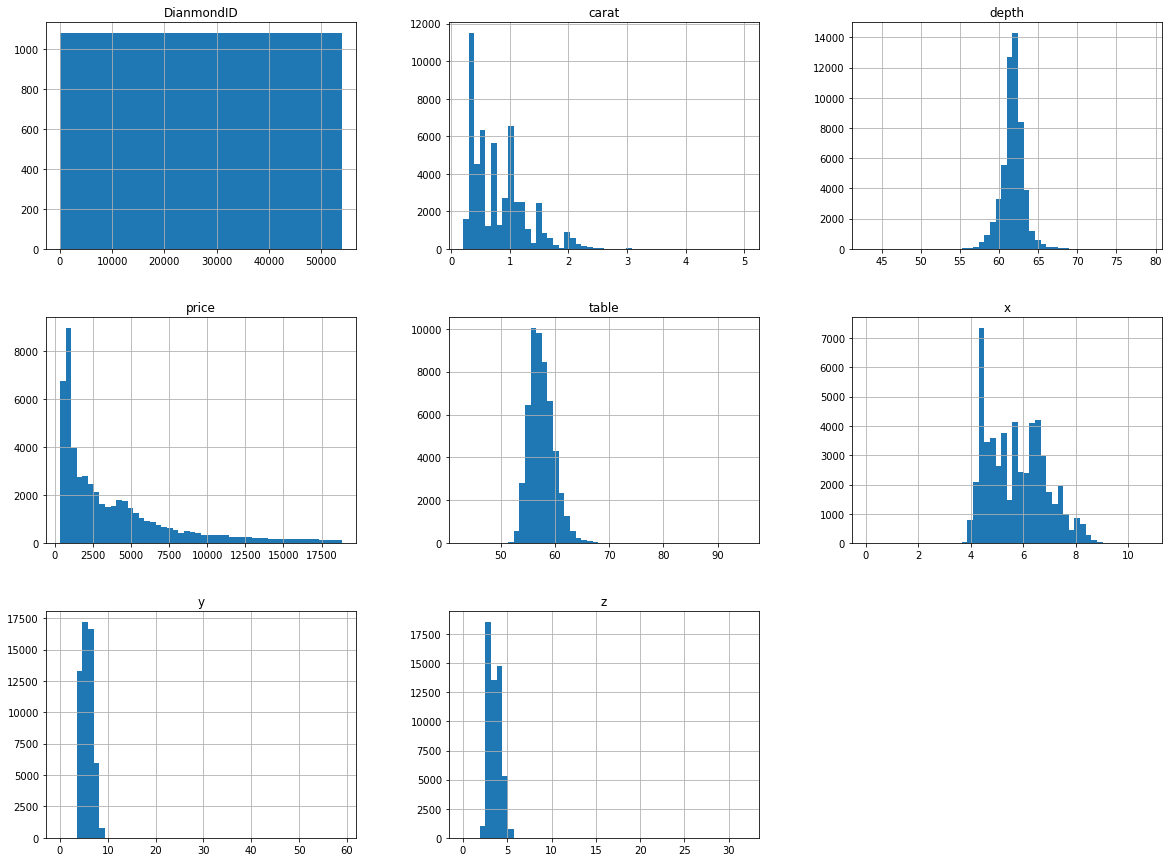

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Some of the histograms are a little bit right skewed, but this is not abnormal.

Let’s create a scatter plot with depth and table to visualize the data:

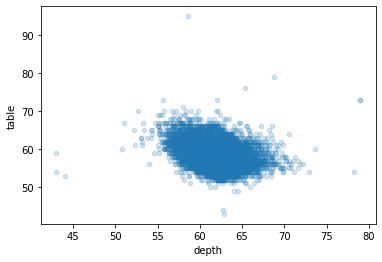

In [12]:
data.plot(kind="scatter", x="depth", y="table", alpha=0.2)
plt.savefig('map1.png')

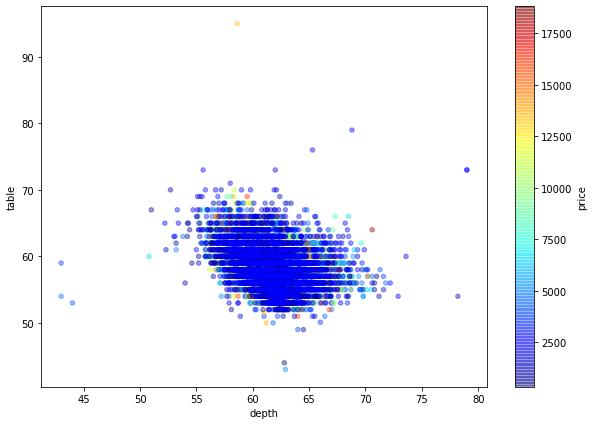

In [13]:
data.plot(kind="scatter", x="depth", y="table", alpha=0.4, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

The variable we are going to predict is the “income”. So let’s look at how much each independent variable correlates with this dependent variable.

In [14]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth        -0.010647
DianmondID   -0.306873
Name: price, dtype: float64

The price tends to increase when the carat, x, y and z go up. You can see a negative correlation between the family persons and the income. And finally, coefficients close to zero indicate that there is no linear correlation.

We are now going to visualize the correlation between variables by using Pandas’ scatter_matrix function. We will just focus on a few promising variables, that seem the most correlated with the price.

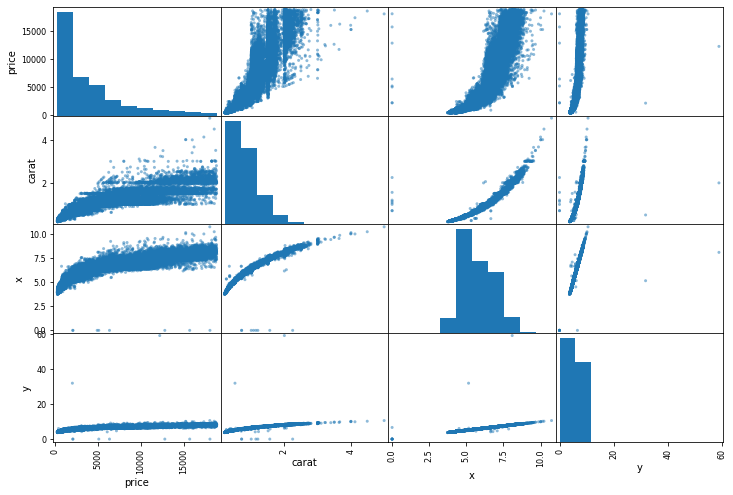

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["price", "carat", "x", "y"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable for predicting the price is the carat, so let’s zoom in on their correlation scatter plot.

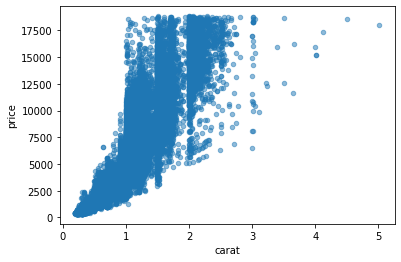

In [16]:
data.plot(kind="scatter", x="carat", y="price", alpha=0.5)
plt.savefig('scatter.png')

The correlation is indeed very strong; you can see the upward trend even though the points are not too dispersed.

Because each diamond has different carat and each clarity has different prices, what we really need is the price per carat. So, we add a new variable “price_per_carat”. We then check to see how much this new independent variable correlates with the price.

In [17]:
data['price_per_carat'] = data['price']/data['carat']
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
carat              0.921591
price_per_carat    0.912377
x                  0.884435
y                  0.865421
z                  0.861249
table              0.127134
depth             -0.010647
DianmondID        -0.306873
Name: price, dtype: float64

Fortunately, the new price_per_carat variable shows only a very high positive correlation with the income. We still use this variable for grouping clarity.

There are 8 clarity types in the data, and we are going to group them.

In [18]:
len(data['clarity'].value_counts())

8

The following steps cluster the clarity types into three groups: 1. low price; 2. high price low freq; 3. high price high freq.

In [19]:
freq = data.groupby('clarity').count()['color']
mean = data.groupby('clarity').mean()['price_per_carat']
cluster = pd.concat([freq, mean], axis=1)
cluster['clarity'] = cluster.index
cluster.columns = ['freq', 'price_per_carat','clarity']
cluster.describe()

,freq,price_per_carat
count,8.000000,8.000000
mean,6742.500000,3901.010028
std,4649.635592,471.395487
min,741.000000,2796.296437
25%,3188.750000,3850.827423
50%,6618.500000,4045.690326
75%,9960.000000,4167.904109
max,13065.000000,4259.931736


These are the low price clarity types:

In [20]:
cluster1 = cluster[cluster.price_per_carat < 4045]
cluster1.index

Index(['I1', 'SI1', 'SI2', 'VVS1'], dtype='object', name='clarity')

These are the high price and low freq clarity types:

In [21]:
cluster_temp = cluster[cluster.price_per_carat >= 4045]
cluster2 = cluster_temp[cluster_temp.freq < 6618]
cluster2.index

Index(['IF', 'VVS2'], dtype='object', name='clarity')

These are the high price and high freq clarity types:

In [22]:
cluster3 = cluster_temp[cluster_temp.freq >= 6618]
cluster3.index

Index(['VS1', 'VS2'], dtype='object', name='clarity')

We add a group column based on the clusters:

In [23]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
data['group'] = data.clarity.apply(get_group)

After performing the above pre-processing, we do not need the following column anymore: “DianmondID", and "clarity". so, we drop them from our analysis.

In [24]:
data.drop(['DianmondID', 'clarity'], axis=1, inplace=True)
data.head()

,carat,cut,color,depth,table,price,x,y,z,price_per_carat,group
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,1417.391304,low_price
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,1552.380952,low_price
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,1421.739130,high_price_high_freq
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,1151.724138,high_price_high_freq
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,1080.645161,low_price


Our data looks perfect!

But before we build the model, we need to create dummy variables for the categorical variables: “group”, "color" and "cut"

In [25]:
data.columns

Index(['carat', 'cut', 'color', 'depth', 'table', 'price', 'x', 'y', 'z',
       'price_per_carat', 'group'],
      dtype='object')

In [26]:
X = data[['carat', 'cut', 'color', 'depth',
          'table', 'x', 'y', 'z', 'price_per_carat', 'group']]
Y = data['price']

n = pd.get_dummies(data.group)
X = pd.concat([X, n], axis=1)

m = pd.get_dummies(data.color)
X = pd.concat([X, m], axis=1)

l = pd.get_dummies(data.cut)
X = pd.concat([X, l], axis=1)

drops = ['group', 'color', 'cut']
X.drop(drops, inplace=True, axis=1)

X.head()

,carat,depth,table,x,y,z,price_per_carat,high_price_high_freq,high_price_low_freq,low_price,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
0,0.23,61.5,55.0,3.95,3.98,2.43,1417.391304,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,1552.380952,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1421.739130,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,1151.724138,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1080.645161,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [27]:
X.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price_per_carat',
       'high_price_high_freq', 'high_price_low_freq', 'low_price', 'D', 'E',
       'F', 'G', 'H', 'I', 'J', 'Fair', 'Good', 'Ideal', 'Premium',
       'Very Good'],
      dtype='object')

In [28]:
X.rename(columns={"D":"color_D", "E":"color_E", "F":"color_F",
                 "G":"color_G", "H":"color_H", "I":"color_I",
                 "J":"color_J"}, inplace=True)

In [29]:
X.rename(columns={"Fair":"cut_Fair", "Good":"cut_Good", "Ideal":"cut_Ideal",
                 "Premium":"cut_Premium", "Very Good":"cut_Very Good"}, inplace=True)

In [30]:
X.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price_per_carat',
       'high_price_high_freq', 'high_price_low_freq', 'low_price', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

This is what our data looks like after creating dummy variables

# Train and Build a Linear Regression Model

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! We now have a working Linear Regression model.

Calculate R squared:

In [32]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.9788


So, in our model, 97.88% of the variability in Y can be explained using X. This is so exciting.

Calculate root-mean-square error (RMSE)

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 581.0253


Our model was able to predict the price of every diamond in the test set within $581 of the real price.

Calculate mean absolute error (MAE):

In [34]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 391.2540


# Random Forest

Let’s try a more complex model to see whether results can be improved — the RandomForestRegressor:

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9995


In [37]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 84.7602


Much worse! Let’s try one more.

# Gradient boosting

In [38]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.9983


In [40]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 166.4294


I would the random forest this is our final model.

# Feature Importance

In [41]:
len(X.columns)

22

We have used 22 features (variables) in our model. Let’s find out which features are important and vice versa.

In [42]:
feature_labels = np.array(X.columns)
importance = forest_reg.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

price_per_carat-71.82%
carat-13.45%
y-10.71%
x-3.89%
z-0.10%
depth-0.00%
table-0.00%
color_J-0.00%
color_H-0.00%
cut_Ideal-0.00%
cut_Very Good-0.00%
cut_Premium-0.00%
cut_Fair-0.00%
color_G-0.00%
color_I-0.00%
low_price-0.00%
color_F-0.00%
color_E-0.00%
cut_Good-0.00%
color_D-0.00%
high_price_low_freq-0.00%
high_price_high_freq-0.00%


# Real time predictions

Now our model has been built, let me use it for real time predictions.

In [43]:
chosenModel = X.columns
chosenModel

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price_per_carat',
       'high_price_high_freq', 'high_price_low_freq', 'low_price', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

In [48]:
X.iloc[0,:]

carat                      0.230000
depth                     61.500000
table                     55.000000
x                          3.950000
y                          3.980000
z                          2.430000
price_per_carat         1417.391304
high_price_high_freq       0.000000
high_price_low_freq        0.000000
low_price                  1.000000
color_D                    0.000000
color_E                    1.000000
color_F                    0.000000
color_G                    0.000000
color_H                    0.000000
color_I                    0.000000
color_J                    0.000000
cut_Fair                   0.000000
cut_Good                   0.000000
cut_Ideal                  1.000000
cut_Premium                0.000000
cut_Very Good              0.000000
Name: 0, dtype: float64

In [49]:
a_1 = float(input("Please enter the diamond's carat: "))
a_2 = float(input("Please enter the diamond's depth: "))
a_3 = float(input("Please enter the diamond's table: "))
a_4 = float(input("Please enter the diamond's x: "))
a_5 = float(input("Please enter the diamond's y: "))
a_6 = float(input("Please enter the diamond's z: "))
a_7 = float(input("Please enter the diamond's price_per_carat: "))
a_8 = int(input("Is the diamond's clarity type of high_price_high_freq, such as 'I1', 'SI1', 'SI2', 'VVS1'? (1 if yes, 0 otherwise): "))
a_9 = int(input("Is the diamond's clarity type of high_price_low_freq, such as 'IF', 'VVS2'? (1 if yes, 0 otherwise): "))
a_10 = int(input("Is the diamond's clarity type low_price, such as 'VS1', 'VS2'? (1 if yes, 0 otherwise): "))
a_11 = int(input("Is the diamond's color D? (1 if yes, 0 otherwise): "))
a_12 = int(input("Is the diamond's color E? (1 if yes, 0 otherwise): "))
a_13 = int(input("Is the diamond's color F? (1 if yes, 0 otherwise): "))
a_14 = int(input("Is the diamond's color G? (1 if yes, 0 otherwise): "))
a_15 = int(input("Is the diamond's color H? (1 if yes, 0 otherwise): "))
a_16 = int(input("Is the diamond's color I? (1 if yes, 0 otherwise): "))
a_17 = int(input("Is the diamond's color J? (1 if yes, 0 otherwise): "))
a_18 = int(input("Is the diamond's cut Fair? (1 if yes, 0 otherwise): "))
a_19 = int(input("Is the diamond's cut Good? (1 if yes, 0 otherwise): "))
a_20 = int(input("Is the diamond's cut Ideal? (1 if yes, 0 otherwise): "))
a_21 = int(input("Is the diamond's cut Premium? (1 if yes, 0 otherwise): "))
a_22 = int(input("Is the diamond's cut Very Good? (1 if yes, 0 otherwise): "))

new_data = np.array([a_1, a_2, a_3, a_4, a_5, a_6, a_7,
                     a_8, a_9, a_10, a_11, a_12, a_13, a_14,
                     a_15, a_16, a_17, a_18, a_19, a_20, a_21,
                     a_22]).reshape(1,-1)
new_pred=forest_reg.predict(new_data)

print("\033[1m The estimated price for that diamond is : $ \033[1m ",float(new_pred[0]))

Please enter the diamond's carat: 0.23
Please enter the diamond's depth: 61.5
Please enter the diamond's table: 55.0
Please enter the diamond's x: 3.95
Please enter the diamond's y: 3.98
Please enter the diamond's z: 2.43
Please enter the diamond's price_per_carat: 1417.391304
Is the diamond's clarity type of high_price_high_freq, such as 'I1', 'SI1', 'SI2', 'VVS1'? (1 if yes, 0 otherwise): 1
Is the diamond's clarity type of high_price_low_freq, such as 'IF', 'VVS2'? (1 if yes, 0 otherwise): 0
Is the diamond's clarity type low_price, such as 'VS1', 'VS2'? (1 if yes, 0 otherwise): 0
Is the diamond's color D? (1 if yes, 0 otherwise): 0
Is the diamond's color E? (1 if yes, 0 otherwise): 1
Is the diamond's color F? (1 if yes, 0 otherwise): 0
Is the diamond's color G? (1 if yes, 0 otherwise): 0
Is the diamond's color H? (1 if yes, 0 otherwise): 0
Is the diamond's color I? (1 if yes, 0 otherwise): 0
Is the diamond's color J? (1 if yes, 0 otherwise): 0
Is the diamond's cut Fair? (1 if yes, 0 

In [56]:
print("\033[1m The real price for that diamond is : $ \033[1m ",float(Y[0]))

 The real price for that diamond is : $   326.0


# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning regression project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.